# Doggo & Catto Deep Learning from scratch



1. configure the new data to the file structure in the same way that was used in the sample lesson 1 notebook
2.  make a copy of the lesson 1 notebook and use the new copy to draw in the new Dogs Vs. Cats data (if you copy the  notebook outside of the course folder, don't forget the utils.py, vgg26.py files etc)
3. Run the relevant code cells on the sample set of new Dogs v. Cats data to make a prediction on the new image data set.
4. Once the sample set works, modify the jupyter notebook to use the new test data images
5. write a script that takes the predict() data of the new Dogs vs. Cats data and writes the data to a new csv file in the format of the sample_submission.csv file that was downloaded with the Dogs vs. Cats
6. submit that new submission.csv file to the kaggle via the CLI tool
7. check the public scoreboard for your own ranking
8. modify or tune current code in the lesson 1 notebook to try to get into the top 50% ranking of the current Dogs v Cats competition
9. start exploring the other new datasets on kaggle and decide which one you or some teammates would like to study further during the course
10. download the new data to your EC2 instance and repeat the previous steps with your brand new data.

## 1. configure the new data to the file structure

In [5]:
import shutil, os, random
import numpy as np

# def makedir(dir):
#     if not os.path.exists(dir):
#         os.makedir(dir)

In [2]:

# arr = os.listdir('../train')
# cats = filter(lambda x: x.split('.')[0] == 'dog', arr)

# print(cats)

#  1. configure the new data to the file structure

# moving the files around into keras expected folders



# path = './data/dogsandcats/train'

# # make folders - cats - dogs

# makedir(path + '/dogs')
# makedir(path + '/cats')

# for file in os.listdir(path):
# #      print(file.split('.')[0])

#         if len(file.split('.')) > 1:
#             category = file.split('.')[0]
#             source = path + "/" + file
#             destination = path + "/" + category + 's/' + file
        
#         print(source, destination)
# #         shutil.move(source, destination)

# print('cats',len(os.listdir(path+'/cats')))
# print('dogs',len(os.listdir(path+'/dogs')))


In [6]:
## create a sampling of the full dataset
# put into sample folder

#  this samples from the larger folder 
#  if you run more than once if will sample more than once
#  but should only create the files once

import os, shutil, random

sourcePath = '../train'
destinationPath = './data/dogsandcats'


def movethem(array, src, dest, folderName, copy=False):
#     print(src, dest)
    
    for file in np.asarray(array):
        category = file.split('.')[0]
        source = src + "/" + file
        destination = dest + "/"+ folderName+ "/" +  category +"/" 

        # create dest folder if not exist
        if not os.path.exists(destination):
            os.makedirs(destination)

#         print(source, destination)
        

        shutil.copyfile(source, destination + file)




def moveForKeras( src, dest, isSample=False, trainsize=8, validsize=4):
   
    arr, train, valid , types = [], [], [], []
    
    destPath = dest
    
    # grab equal size sample of each category
    imgs = os.listdir(src)
    
    for file in imgs:
        category = file.split('.')[0]
#         print(category)
        if category not in types:
            types.append(category)
    
    print(len(imgs))
    print(types)
    
    
    if isSample:
        
        for imgType in types:
            oneTypeArr = filter(lambda x: x.split('.')[0] == imgType, imgs)
            arr = random.sample(oneTypeArr, trainsize + validsize)
    
            train = arr[:trainsize]
            valid = arr[validsize:]
            destPath = dest + '/sample'
            
            print(len(train), len(valid))
            
            movethem(train, src, destPath, 'train', isSample)
            movethem(valid, src, destPath, 'valid', isSample)
        
    else:
        imgs = np.asarray(imgs)
        l = len(imgs)
        
        train, valid = imgs[0:int(l*0.8)], imgs[int(l*0.8):l]
        
        print(len(train), len(valid))
        
        movethem(train, src, destPath, 'train', isSample)
        movethem(valid, src, destPath, 'valid', isSample)
        
#     print('train', train)
#     print('valid', valid)
    
    


# sort for SAMPLE set 
moveForKeras(sourcePath, destinationPath, True)

# sort for WHOLE set
moveForKeras(sourcePath, destinationPath)


print('training folders populated with ', len(os.listdir(destinationPath + '/train' + '/dog')), 'dog photos')
print('training folders populated with ', len(os.listdir(destinationPath + '/valid' + '/dog')), 'dog photos')


print('training folders populated with ', len(os.listdir(destinationPath + '/train' + '/cat')), 'cat photos')
print('training folders populmated with ', len(os.listdir(destinationPath + '/valid' + '/cat')), 'cat photos')
# for path in os.listdir(destinationPath + '/sample'):
#     print()


25000
['dog', 'cat']
8 8
8 8
25000
['dog', 'cat']
20000 5000
training folders populated with  10016 dog photos
training folders populated with  2484 dog photos
training folders populated with  9984 cat photos
training folders populmated with  2516 cat photos


In [42]:
#### create the test folder structure

## insert 'unknown' into test folder ( as though it is a class )


sample_amount = 8

test_path = '../test'

test_imgs = os.listdir(test_path)
    
for file in np.asarray(test_imgs):
    source = test_path + "/" + file
    destination = test_path + "/unknown/" + file 

    # create dest folder if not exist
    if not os.path.exists(destination):
        os.makedirs(destination)

#         print(source, destination)
    if not file == 'unknown':  
#     print(source, destination, len(os.listdir(test_path+'/unknown/')))
        shutil.move(source, destination)

print('files in test/unknown folder', len(os.listdir(test_path+'/unknown')))

files in test/unknown folder 12500


## Dogs and cats model from vgg16

In [1]:
#  CONFIG AN VARS I DONT UNDERSTAND YET

%matplotlib inline
# %qtconsole

path = './data/dogsandcats/'
# path = './data/dogsandcats/sample/'

# path = '../test'

## Model setup
We need to import all the modules we'll be using from numpy, scipy, and keras:

In [2]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

### utils 

In [3]:
import utils; reload(utils)
from utils import plots

ImportError: No module named bcolz

In [4]:
import datetime

from numpy.random import random, permutation

from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing import image

# In case we are going to use the TensorFlow backend we need to explicitly set the Theano image ordering
from keras import backend as K
K.set_image_dim_ordering('th')

In [5]:
FILES_PATH = 'http://files.fast.ai/models/'; CLASS_FILE='imagenet_class_index.json'
# Keras' get_file() is a handy function that downloads files, and caches them for re-use later
fpath = get_file(CLASS_FILE, FILES_PATH+CLASS_FILE, cache_subdir='models')
with open(fpath) as f: class_dict = json.load(f)
# Convert dictionary with string indexes into an array
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

In [19]:
classes

['cat', 'dog']

## Model creation

Creating the model involves creating the model architecture, and then loading the model weights into that architecture. We will start by defining the basic pieces of the VGG architecture.

VGG has just one type of convolutional block, and one type of fully connected ('dense') block. Here's the convolutional block definition:

In [7]:
def ConvBlock(layers, model, filters):
    for i in range(layers): 
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

In [8]:
# Fully connected block
def FCBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

When the VGG model was trained in 2014, the creators subtracted the average of each of the three (R,G,B) channels first, so that the data for each channel had a mean of zero. Furthermore, their software that expected the channels to be in B,G,R order, whereas Python by default uses R,G,B. We need to preprocess our data to make these two changes, so that it is compatible with the VGG model:

In [9]:


# Mean of each channel as provided by VGG researchers
vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))



def vgg_preprocess(x):
    x = x - vgg_mean     # subtract mean
    return x[:, ::-1]    # reverse axis bgr->rgb

## Model Architecture

In [10]:
def VGG_16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224)))

    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)

    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    model.add(Dense(1000, activation='softmax'))
    return model

In [11]:
model = VGG_16()

### Weights




In [12]:
# trained_model = '2017-11-14-doggo.h5'
# # model = 'vgg16.h5'

fpath = get_file('vgg16.h5', FILES_PATH+'vgg16.h5', cache_subdir='models')
model.load_weights(fpath)

# model.load_weights('./2017-12-07-doggo.h5')

In [13]:
batch_size = 64

In [14]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

In [15]:
batches = get_batches('train', batch_size=batch_size)
val_batches = get_batches('valid', batch_size=batch_size)




Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## finetune

In [16]:
"""
    Modifies the original VGG16 network architecture and updates self.classes for new training data.

"""
"""
    Replace the last layer of the model with a Dense (fully connected) layer of num neurons.
    Will also lock the weights of all layers except the new layer so that we only learn
    weights for the last layer in subsequent training.

"""
model.pop()
for layer in model.layers: layer.trainable=False
model.add(Dense(batches.nb_class, activation='softmax'))
"""
    Configures the model for training.
    See Keras documentation: https://keras.io/models/model/
"""
model.compile(optimizer=Adam(lr=0.001),
        loss='categorical_crossentropy', metrics=['accuracy'])


classes = list(iter(batches.class_indices)) # get a list of all the class labels

# batches.class_indices is a dict with the class name as key and an index as value
# eg. {'cats': 0, 'dogs': 1}

# sort the class labels by index according to batches.class_indices and update model.classes
for c in batches.class_indices:
    classes[batches.class_indices[c]] = c

print(classes) 

['cat', 'dog']


In [17]:
# save current classes to a file
# classFile = open('./classes/doggo-classes.json', "a+")
# classDump = json.dumps({"classes":classes})

# print(classDump)

# classFile.write(classDump) 
# # for i in classes: 
# #     classFile.write(classes)
# classFile.close()

In [18]:
#  LOAD saved json classes

# classes = json.loads('./classes/doggo-classes.json')

## fit data

In [ ]:
"""
    Fits the model on data yielded batch-by-batch by a Python generator.
    See Keras documentation: https://keras.io/models/model/
"""
#  this is the model being trained batch by batch
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=1,
        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

# save weights to file when training is done
# model.save_weights('{}-doggo'.format(datetime.datetime.now().strftime("%Y-%m-%d"))+".h5")


Epoch 1/1
 2496/20000 [==>...........................] - ETA: 443s - loss: 0.1988 - acc: 0.9367

## Prediction

In [18]:
#  save model
model.save_weights('{}-doggo-untrained'.format(datetime.datetime.now().strftime("%Y-%m-%d"))+".h5")

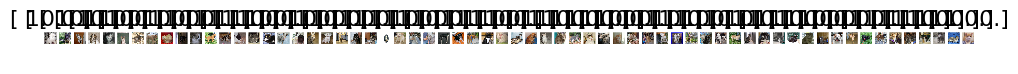

In [23]:

imgs,labels = next(batches)

# This shows the 'ground truth'
plots(imgs, titles=labels)

In [24]:
def pred_batch(imgs):
    preds = model.predict(imgs)
    idxs = np.argmax(preds, axis=1)

    print('Shape: {}'.format(preds.shape))
    print('First 5 classes: {}'.format(classes[:5]))
    print('First 5 probabilities: {}\n'.format(preds[0, :5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))

In [21]:
pred_batch(imgs)

NameError: name 'imgs' is not defined

# Testing the model


In [20]:
##  get test batches

print(len(os.listdir('../test/unknown')), 'test images')
# print(dirname)

test_batches = image.ImageDataGenerator().flow_from_directory('../test/unknown', target_size=(224,224), 
                class_mode=None, shuffle=False, batch_size=128)        

imgs = next(test_batches)
# plots(imgs, preds)

12500 test images
Found 12500 images belonging to 12500 classes.


## predict to kaggle csv submission format

In [21]:
import pandas as pd

preds = model.predict_generator(test_batches, test_batches.nb_sample)


In [41]:
# format predictions into a dataframe

ids = map(lambda img: int(img.split('.')[0]), test_batches.class_indices)
dogs = map(lambda arr: arr[1], preds)
    
# clip . predictions
probablity_is_dog = map(lambda pred: 0.90000 if pred > 0.90001 else pred  , dogs )
# probablity_is_dog = dogs


In [42]:
df = pd.DataFrame({
    'id' : ids,
    'label' : probablity_is_dog
 })

# sort by image id number
df = df.sort_values(by=['id'])

print(df.head(10))

       id         label
9891    1  9.000000e-01
1846    2  9.000000e-01
11319   3  1.059537e-13
12170   4  9.000000e-01
3096    5  1.279798e-05
12147   6  9.000000e-01
8548    7  7.165514e-08
3925    8  4.039388e-07
910     9  9.000000e-01
2853   10  9.000000e-01


In [43]:
#  WRITE to CSV
submission = open('./submission.csv', 'a+')
submission.write('id,label\n')

for index, row in df.iterrows():
    string = "{:.0f},{:.10f}\n".format(row['id'], row['label'])
#     print(string)
    submission.write(string)

    
submission.close()

In [36]:
import sys
print( sys.version)

2.7.13 |Anaconda 4.4.0 (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
